# **Task 2: Credit Risk Prediction:**
**Objective:**

 Predict whether a loan applicant is likely to default on a loan.

**Dataset:**

 Loan Prediction Dataset (available on Kaggle)

**Instructions:**
- Handle missing data appropriately.
- Visualize key features such as loan amount, education, and income.
- Train a classification model like Logistic Regression or Decision Tree.
- Evaluate the model using accuracy and a confusion matrix.

Skills:
- Data cleaning and handling missing values
- Exploratory Data Analysis (EDA)
- Binary classification using machine learning
- Model evaluation using confusion matrix and accuracy

# Import Libraries:

In [126]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')


# Load Data:

In [127]:
# load data
df = pd.read_csv('/content/credit_risk_dataset.csv.zip')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# EDA:
## Shape of Data:

In [128]:
df.shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 32581
Number of columns: 12


- The target column in this credit risk dataset is loan_status, where 1 indicates default and 0 means non-default.


In [129]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Missing Values:

In [131]:
# 🔍 3. Check Missing Values
print(df.isnull().sum())


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


## Fill missing Data:

In [132]:
# fill missing values...person_emp_length , loan_int_rate
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

- Used Median to fill missing values instead of Mean.
- Median is the middle value of a sorted list, so it's less sensitive to outliers.
- the median gives a better central tendency than the mean or a random integer.


In [133]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


## Check Inconsistency in Data:

In [134]:
# Check duplicates
df.duplicated().sum()

np.int64(165)

In [135]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [136]:
# check all columns unique
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

person_age: [ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]
person_income: [  59000    9600   65500 ...  720000 1900000    4888]
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
person_emp_length: [123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  11.  18.
  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.  25.
  27.  28.  31.  41.  34.  29.  38.  30.]
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
loan_amnt: [35000  1000  5500  2500  1600  4500 30000  1750 34800 34000  1500 33950
 33000  4575  1400 32500  4000  2000 32000 31050 24250  7800 20000 10000
 25000 18000 12000 29100 28000  9600  3000  6100  4200  4750  4800  2700
 27600  3250 27500 27050 27000 26000 25600 25475 2160

## Data Visualization:

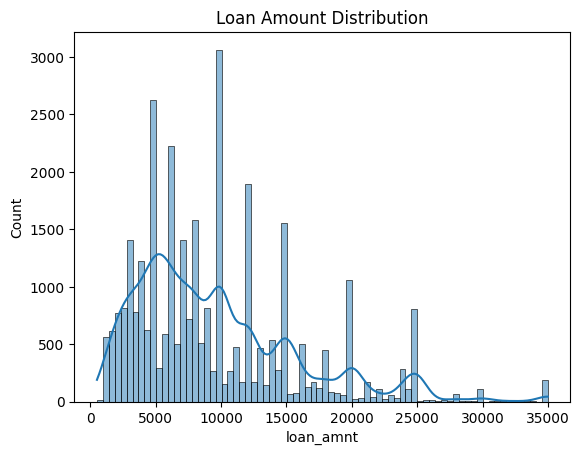

In [137]:
# 📊 5. Visualize Key Features
# Loan Amount
sns.histplot(df['loan_amnt'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()


- The curve is right-skewed, indicating that small loans are more common, while large loans are rare.


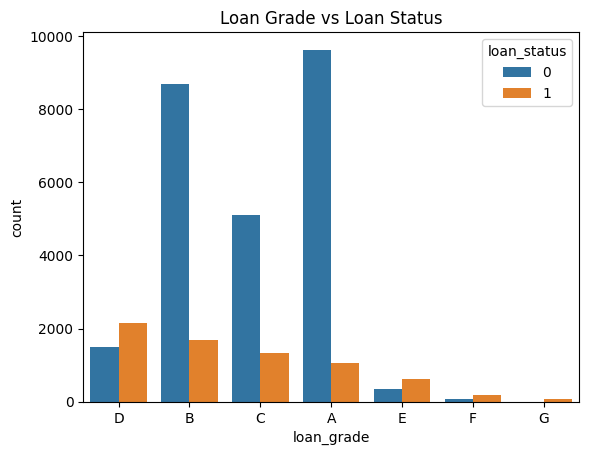

In [138]:
# Loan Grade vs Loan Status
sns.countplot(x='loan_grade', hue='loan_status', data=df)
plt.title('Loan Grade vs Loan Status')
plt.show()


1. Grade A, B, and C dominate the dataset
  - These grades have the highest number of loans, especially Grade A, which shows a strong presence of non-defaults (status = 0).
2. Default risk increases with lower grades
- Grades D, E, F, and G show a higher proportion of defaults (status = 1) relative to their total loan count.


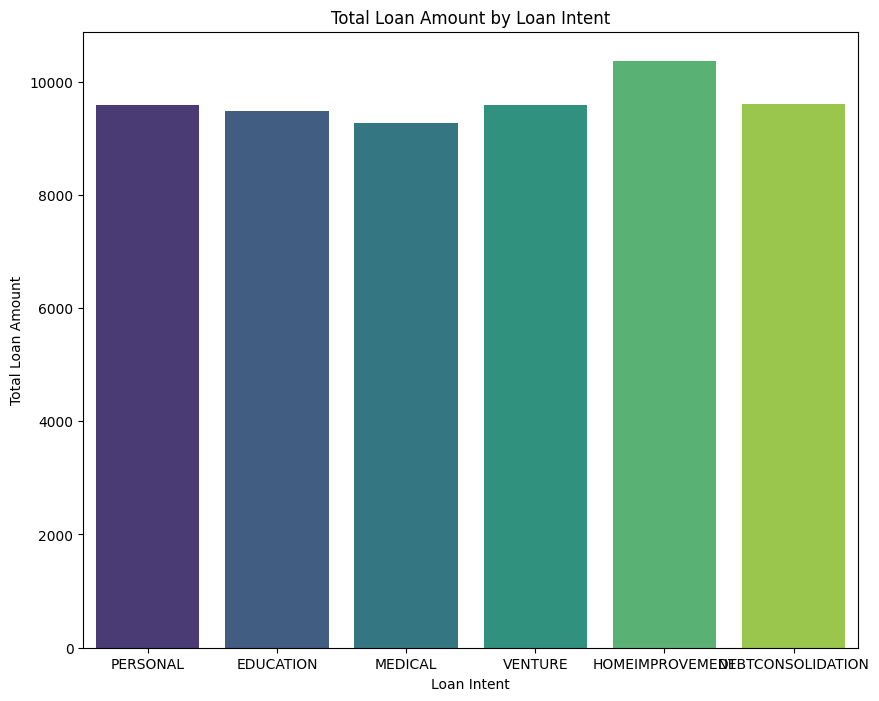

In [139]:
#  Bar plot: Total Loan Amount by Loan Intent
plt.figure(figsize=(10, 8))
sns.barplot(x="loan_intent", y="loan_amnt", data=df, ci=None, palette="viridis")
plt.title("Total Loan Amount by Loan Intent")
plt.ylabel("Total Loan Amount")
plt.xlabel("Loan Intent")
plt.show()


-  loan intent categories like HOMEIMPROVEMENT and DEBTCONSOLIDATION receive the highest total loan amounts, indicating borrowers in these areas tend to request larger loans compared to EDUCATION or MEDICAL purposes.


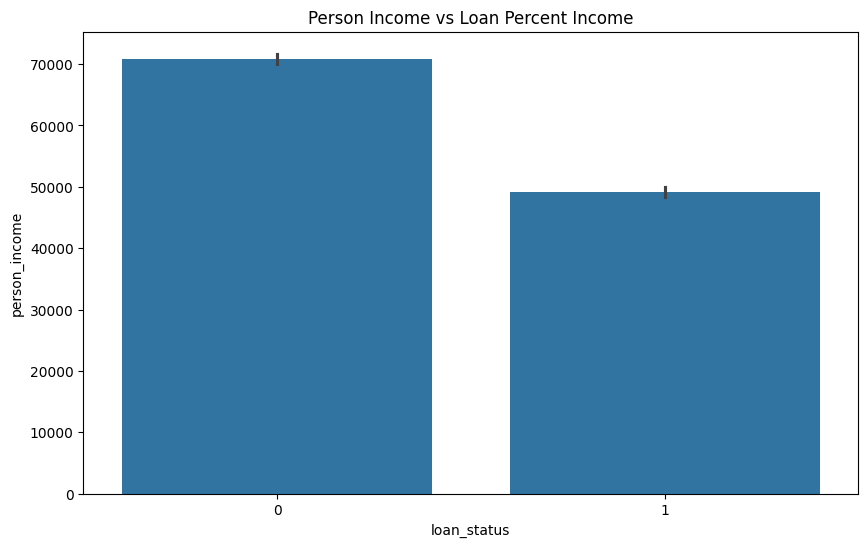

In [140]:
# Plot Person Income vs Loan Percent Income bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='person_income', data=df)
plt.title('Person Income vs Loan Percent Income')
plt.show()

- Non-defaulters (status = 0) have higher average income than defaulters (status = 1), showing income is a key factor in creditworthiness.

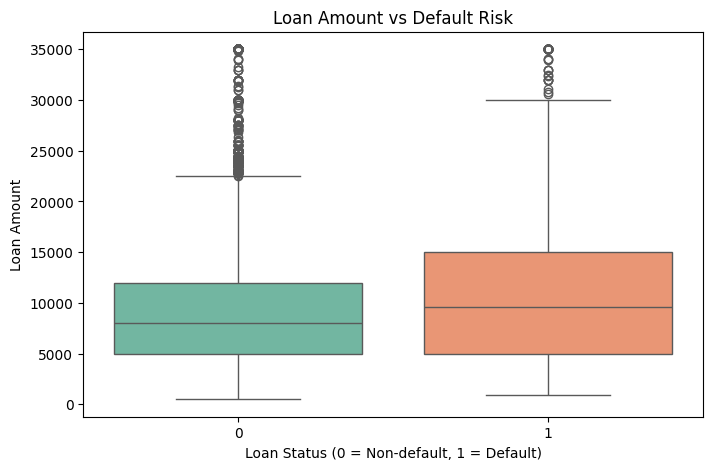

In [141]:
#  Boxplot: Loan Amount vs Loan Status
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette="Set2")
plt.title("Loan Amount vs Default Risk")
plt.xlabel("Loan Status (0 = Non-default, 1 = Default)")
plt.ylabel("Loan Amount")
plt.show()



- Borrowers who default (loan_status = 1) tend to have higher loan amounts on average, with a wider spread and more outliers compared to non-defaulters (loan_status = 0).


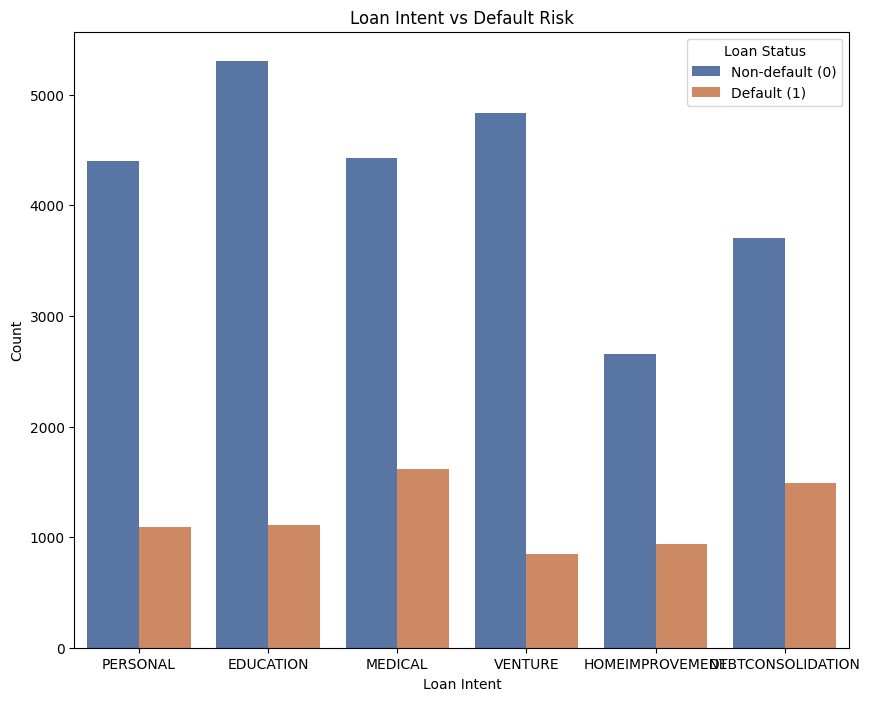

In [142]:
#  Countplot: Loan Intent vs Loan Status
plt.figure(figsize=(10, 8))
sns.countplot(x="loan_intent", hue="loan_status", data=df, palette="deep")
plt.title("Loan Intent vs Default Risk")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Non-default (0)", "Default (1)"])
plt.show()


-  Loan intents like MEDICAL and DEBTCONSOLIDATION have noticeably higher counts of defaults (loan_status = 1) compared to EDUCATION or HOMEIMPROVEMENT, indicating that borrowers seeking loans for urgent or high-debt reasons may carry greater credit risk.


# Distribution:

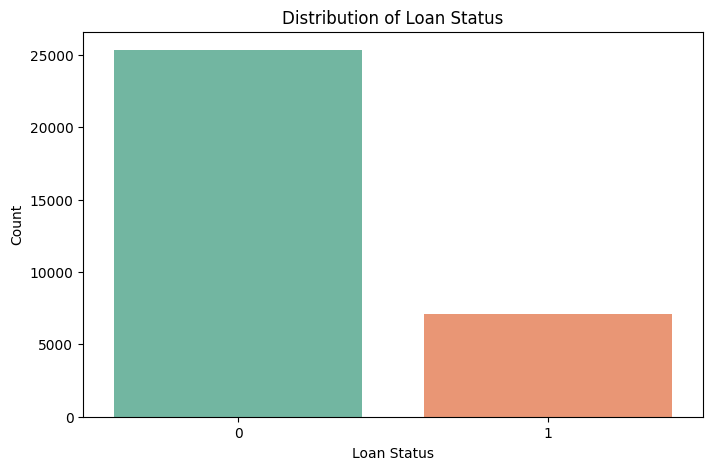

In [143]:
# Distribution of Target column
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [144]:
df['loan_status'].value_counts()

,count
loan_status,
0,25327
1,7089


- The class is imbalanced , far more loans were paid than defaulted.


## Label Encoding:

In [145]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Encode Categorical Variables first
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

# Separate features (X) and target (y) after encoding
X = df.drop('loan_status', axis=1)
y = df['loan_status']     # 1 = approved, 0 = rejected

## Normalize Distribution:

In [146]:

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new distribution
print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled))

Original dataset shape: Counter({0: 25327, 1: 7089})
Resampled dataset shape: Counter({1: 25327, 0: 25327})


Resampled dataset shape: Counter({1: 25327, 0: 25327})


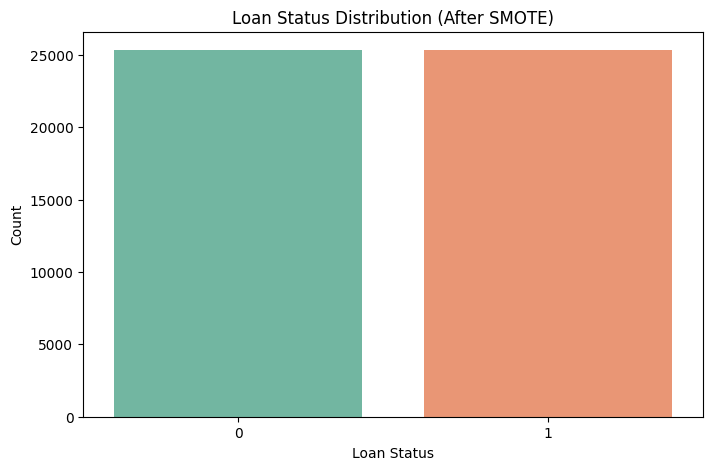

In [147]:
# New distribution
print("Resampled dataset shape:", Counter(y_resampled))

plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled, palette="Set2")
plt.title("Loan Status Distribution (After SMOTE)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Split Data:

In [148]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Train:
## Logistic Regression:

In [149]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Predict:

In [150]:
y_pred_log = log_model.predict(X_test)

## Decision Tree Classifier:

In [151]:
# Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Predict:

In [152]:
y_pred_tree = tree_model.predict(X_test)

# Evaluate Models:

In [153]:
#  Evaluate Models

# Logistic Regression
print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Decision Tree
print("\n Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


 Logistic Regression Accuracy: 0.837137569401604

 Decision Tree Accuracy: 0.885101789019124


## Confusion Matrix:

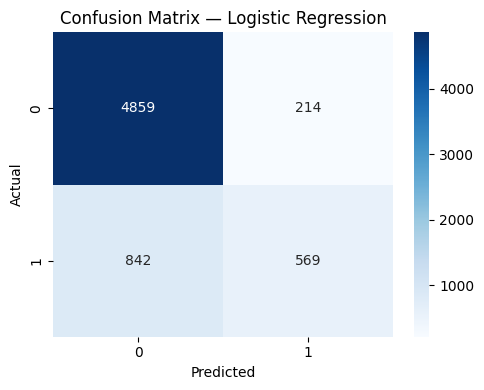

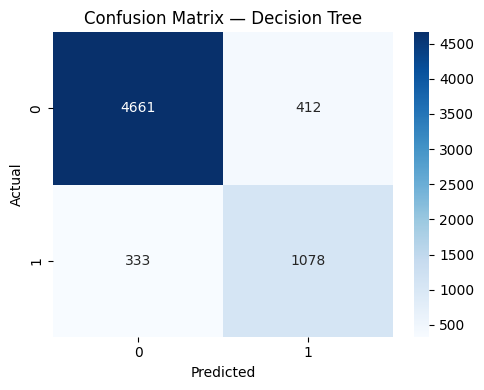

In [154]:
# 7) Confusion matrix helper
def plot_confusion(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[0,1], yticklabels=[0,1])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Logistic Regression CM
cm_lr = confusion_matrix(y_test, y_pred_log)
plot_confusion(cm_lr, "Confusion Matrix — Logistic Regression")

# Decision Tree CM
cm_dt = confusion_matrix(y_test, y_pred_tree)
plot_confusion(cm_dt, "Confusion Matrix — Decision Tree")

- **Logistic Regression** is conservative, it avoids false alarms but misses many actual defaults.
- Useful when false positives are costly, but risky if missing defaults is dangerous.
- **Decision Tree** is aggressive, it catches more defaults but risks more false positives.
- Useful when catching defaults is critical, even if it means some false alarms.


# Classification Report:

In [155]:
#  Logistic Regression classification report
print("Classification Report — Logistic Regression")
print(classification_report(y_test, y_pred_log, digits=4))

Classification Report — Logistic Regression
              precision    recall  f1-score   support

           0     0.8523    0.9578    0.9020      5073
           1     0.7267    0.4033    0.5187      1411

    accuracy                         0.8371      6484
   macro avg     0.7895    0.6805    0.7103      6484
weighted avg     0.8250    0.8371    0.8186      6484



- The model is biased toward class 0 (paid loans).
- It performs well overall but struggles to detect defaults.


In [156]:
# 9) Decision Tree classification report
print("Classification Report — Decision Tree")
print(classification_report(y_test, y_pred_tree, digits=4))

Classification Report — Decision Tree
              precision    recall  f1-score   support

           0     0.9333    0.9188    0.9260      5073
           1     0.7235    0.7640    0.7432      1411

    accuracy                         0.8851      6484
   macro avg     0.8284    0.8414    0.8346      6484
weighted avg     0.8877    0.8851    0.8862      6484



- Decision Tree performs well across both classes, especially on the minority class (defaults).
- Compared to Logistic Regression, it has:
- ✅ Higher recall for defaults
- ✅ Better F1-score for class 1
- ✅ Higher overall accuracy


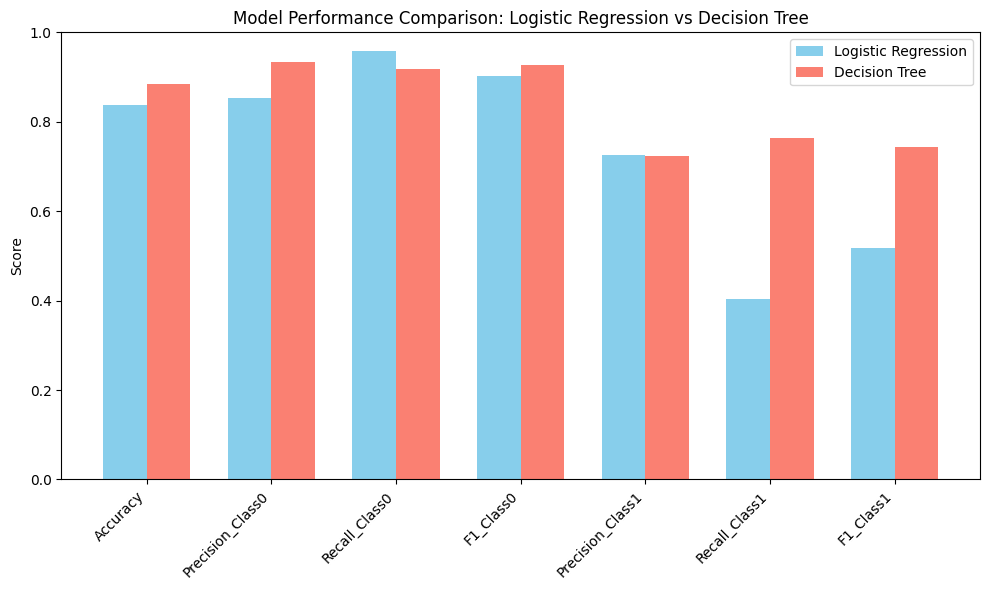

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and values
metrics = ['Accuracy','Precision_Class0','Recall_Class0','F1_Class0',
           'Precision_Class1','Recall_Class1','F1_Class1']

log_reg = [0.8371,0.8523,0.9578,0.9020,0.7267,0.4033,0.5187]
dec_tree = [0.8851,0.9333,0.9188,0.9260,0.7235,0.7640,0.7432]

# Bar positions
x = np.arange(len(metrics))
width = 0.35

# Plot bars
plt.figure(figsize=(10,6))
plt.bar(x - width/2, log_reg, width, label='Logistic Regression', color='skyblue')
plt.bar(x + width/2, dec_tree, width, label='Decision Tree', color='salmon')

# Labels and formatting
plt.xticks(x, metrics, rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Comparison: Logistic Regression vs Decision Tree')
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.show()

# Accuracy Comparison b/w both Models:

In [158]:
# Accuracy comparison summary
acc_lr = accuracy_score(y_test, y_pred_log)
acc_dt = accuracy_score(y_test, y_pred_tree)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [acc_lr, acc_dt]
}).sort_values(by='Accuracy', ascending=False)

print("\nModel Accuracy Comparison:")
print(results.to_string(index=False))


Model Accuracy Comparison:
              Model  Accuracy
      Decision Tree  0.885102
Logistic Regression  0.837138


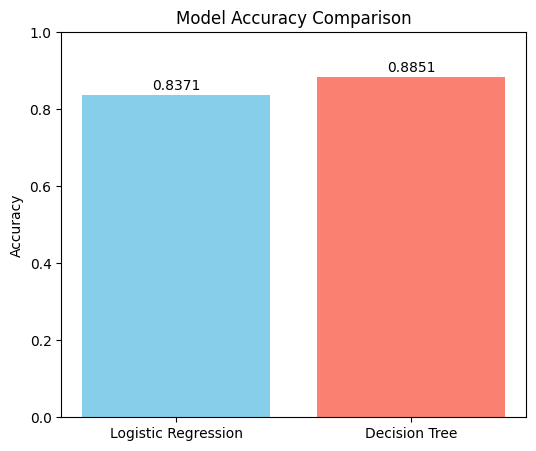

In [159]:

# Accuracy values
models = ['Logistic Regression', 'Decision Tree']
accuracy = [0.8371, 0.8851]

# Plot
plt.figure(figsize=(6,5))
bars = plt.bar(models, accuracy, color=['skyblue','salmon'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005,
             f"{yval:.4f}", ha='center', va='bottom')

# Labels and title
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.show()

🌳 Decision Tree
- Accuracy: 88.51%
- Captures both classes well, especially defaults (class 1).
- Strong choice for imbalanced datasets.
- Slightly more false positives, but better recall.

📈 Logistic Regression
- Accuracy: 83.71%
- Performs well on majority class (paid loans).
- Misses many defaults — lower recall for class 1.
- More conservative, fewer false alarms.
